In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [246]:
mo = pd.read_excel("xaks/МС_Республика Мордовия.xls")  #Датасет Мордовии
tr = pd.read_excel("xaks/МС_Республика Татарстан.xls") #Датасет Татарсан
ud = pd.read_excel("xaks/МС_Республика Удмуртия.xls")  #Датасет Удмуртии
ch = pd.read_excel("xaks/МС_Республика Чувашия.xls")   #Датасет Чувашии
ef = pd.read_excel("xaks/Обращения.xls")               #Датасет обрашения

In [247]:
mo.info() # Размер (37863, 18)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37863 entries, 0 to 37862
Data columns (total 18 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   ID                                                                        37863 non-null  int64  
 1   Находится в реестре МСП                                                   37863 non-null  object 
 2   Размер компании.Наименование                                              37448 non-null  object 
 3   Размер уставного капитала объявленный                                     30602 non-null  float64
 4   ОКВЭД2.Наименование                                                       35738 non-null  object 
 5   ОКВЭД2.Код                                                                35738 non-null  object 
 6   Численность персонала по данным ФНС.Количество                

In [248]:
#Разьиение типов фичей в выгрузках Маркетинговых списков
cat_cols = [
    "Размер компании.Наименование",
    "ОКВЭД2.Наименование", "Город фактический",
    "Город юридический", "Карточка клиента (внешний источник).Индекс платежной дисциплины Описание",
    "Карточка клиента (внешний источник).Индекс финансового риска Описание",
    "Госконтракты.Контракт"
]

num_cols = [
    "Размер уставного капитала объявленный",
    "ОКВЭД2.Код", "Численность персонала по данным ФНС.Количество",
    "Карточка клиента (внешний источник).Индекс платежной дисциплины Значение",
    "Карточка клиента (внешний источник).Индекс финансового риска Значение"    
]

binary_cols = [
    "Находится в реестре МСП", 
    "ЕЛС действующий",#Проверка на наличие счета(надо переделать)
    "Грузоотправитель", "Грузополучатель",
    "Госконтракты.Тип контракта"#(переделать заказчик или исполнитель в 0 или 1)
]

id_cols = ["ID"]

In [249]:
ef.info() # Размер (2826, 8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2826 entries, 0 to 2825
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Дата                  2826 non-null   object
 1   Тема                  2826 non-null   object
 2   ID                    2826 non-null   int64 
 3   Тип обращения         2826 non-null   object
 4   Номер                 2826 non-null   object
 5   Тема вопроса          2825 non-null   object
 6   Группа вопросов       2825 non-null   object
 7   Количество доработок  3 non-null      object
dtypes: int64(1), object(7)
memory usage: 176.8+ KB


In [250]:
#Разьиение типов фичей в выгрузках ОБращений
date_cols1 = [
    "Дата"
]
cat_cols1 = [
    "Тема",
    "Тип обращения",#удалить за ненадобностью для модели
    "Тема вопроса",
    "Количество доработок" # удалить по причине недостатка данных
]

num_cols1 = [
    "Номер" #можно удалить и заменить на id строки в датасете, сохранить как такой номер и использовать при обьединении
]
id_cols1 = ["ID"]

In [251]:
ef = ef.drop(["Количество доработок", "Тип обращения"], axis = 1)

In [252]:
ef.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2826 entries, 0 to 2825
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Дата             2826 non-null   object
 1   Тема             2826 non-null   object
 2   ID               2826 non-null   int64 
 3   Номер            2826 non-null   object
 4   Тема вопроса     2825 non-null   object
 5   Группа вопросов  2825 non-null   object
dtypes: int64(1), object(5)
memory usage: 132.6+ KB


In [253]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
lr = LabelEncoder()
scaler = StandardScaler()

In [241]:
for col in cat_cols:
    mo[col] = mo[col].str.lower()
    mo[col] = mo[col].str.strip()
    
    mo[col] = lr.fit_transform(mo[col])

In [255]:
mo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37863 entries, 0 to 37862
Data columns (total 18 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   ID                                                                        37863 non-null  int64  
 1   Находится в реестре МСП                                                   37863 non-null  object 
 2   Размер компании.Наименование                                              37448 non-null  object 
 3   Размер уставного капитала объявленный                                     30602 non-null  float64
 4   ОКВЭД2.Наименование                                                       35738 non-null  object 
 5   ОКВЭД2.Код                                                                35738 non-null  object 
 6   Численность персонала по данным ФНС.Количество                

In [260]:
r_data = pd.read_csv("xaks/Интересы_Преобразованный.csv")
p_data = pd.read_csv("xaks/Обращения_Преобразованный.csv")
for col in ["Дата"]:   
    p_data[col] = pd.to_datetime(p_data[col], format="mixed", dayfirst=True)

for col in ["Дата", "Дата следующей активности"]:   
    r_data[col] = pd.to_datetime(r_data[col], format="mixed", dayfirst=True)

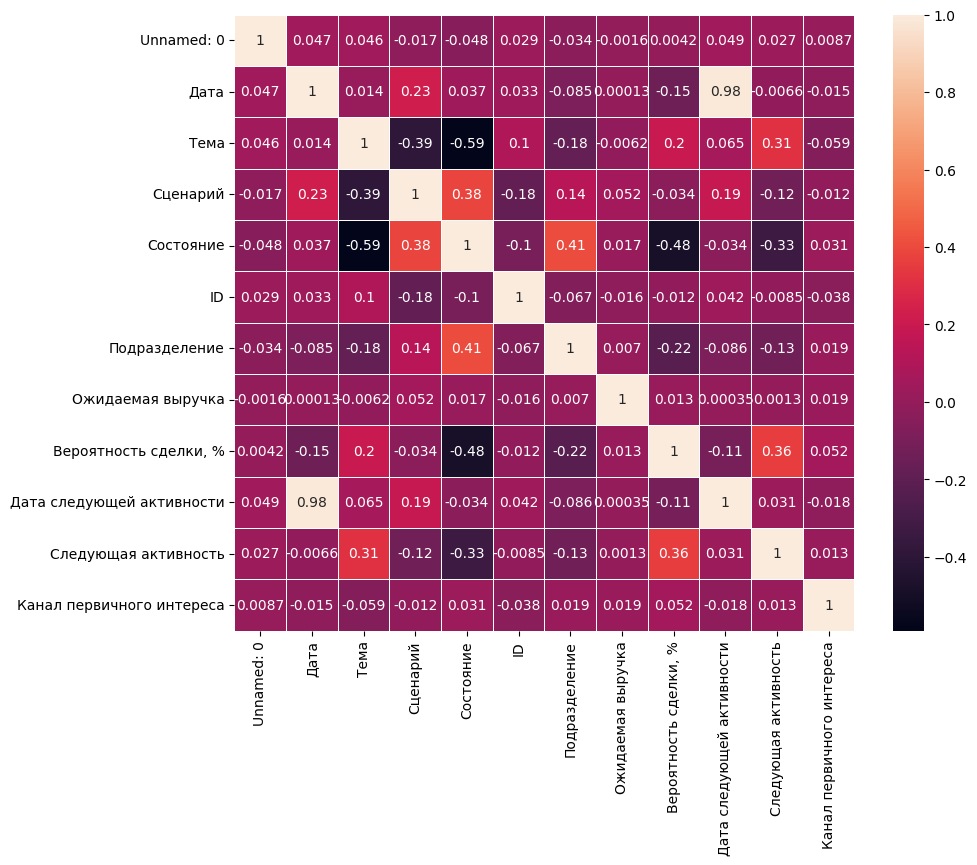

In [261]:
table = r_data.corr()
table
plt.figure(figsize=(10, 8))
sns.heatmap(table, annot=True, linewidth=0.5)
plt.show()

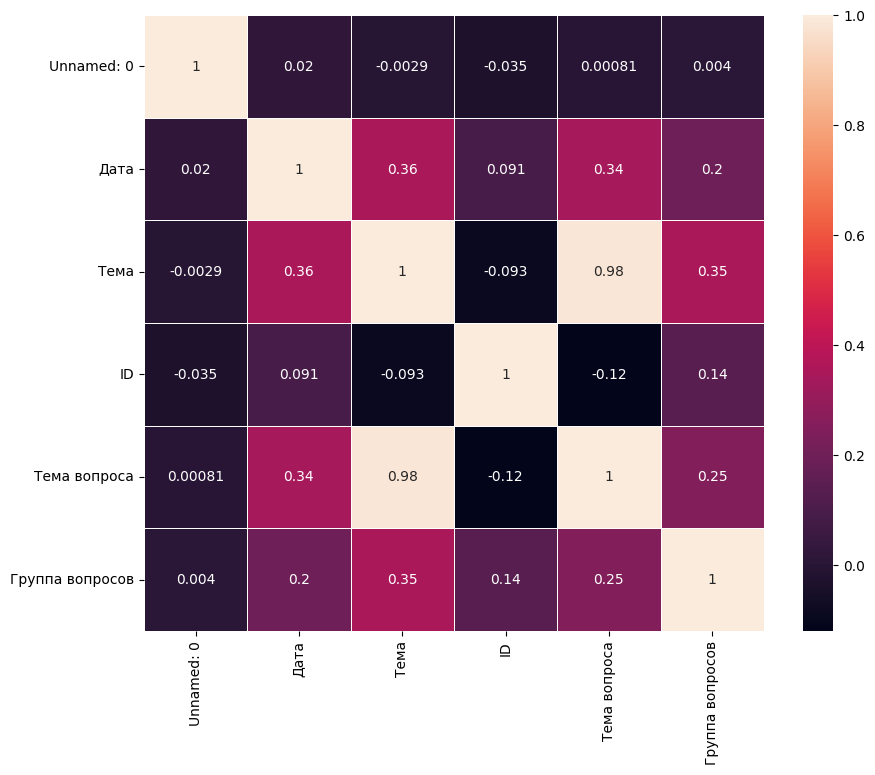

In [262]:
table = p_data.corr()
table
plt.figure(figsize=(10, 8))
sns.heatmap(table, annot=True, linewidth=0.5)
plt.show()